<a href="https://colab.research.google.com/github/SARIKELLA-MADHU/Machine-Learning/blob/main/ML_week_9_(U5)ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np

def sigmoid(x):
    # Activation function
    return 1 / (1 + np.exp(-x))

class Neuron:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias

    def feedforward(self, inputs):
        total = np.dot(self.weights, inputs) + self.bias
        return sigmoid(total)

weights = np.array([0, 1])  # w1 = 0, w2 = 1
bias = 4
n = Neuron(weights, bias)
x = np.array([2, 3])
print(n.feedforward(x))  # Output: 0.9990889488055994


0.9990889488055994


In [3]:
import numpy as np

class Perceptron:
    def __init__(self, learning_rate=0.1, epochs=100):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def step_function(self, x):
        return np.where(x >= 0, 1, 0)

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        for _ in range(self.epochs):
            for i in range(n_samples):
                linear_output = np.dot(self.weights, X[i]) + self.bias
                y_pred = self.step_function(linear_output)
                update = self.learning_rate * (y[i] - y_pred)
                self.weights += update * X[i]
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_pred = self.step_function(linear_output)
        return y_pred


# ---- AND Gate ----
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([0,0,0,1])
p = Perceptron(learning_rate=0.1, epochs=10)
p.fit(X, y)
print("AND Gate:", p.predict(X))

# ---- OR Gate ----
y = np.array([0,1,1,1])
p.fit(X, y)
print("OR Gate:", p.predict(X))

# ---- XOR Gate ---- (Non-linear, perceptron will fail)
y = np.array([0,1,1,0])
p.fit(X, y)
print("XOR Gate:", p.predict(X))


AND Gate: [0 0 0 1]
OR Gate: [0 1 1 1]
XOR Gate: [1 1 0 0]


In [4]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

class Neuron:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias

    def feedforward(self, inputs):
        total = np.dot(self.weights, inputs) + self.bias
        return sigmoid(total)

class OurNeuralNetwork:
    def __init__(self):
        weights = np.array([0, 1])
        bias = 0
        self.h1 = Neuron(weights, bias)
        self.h2 = Neuron(weights, bias)
        self.o1 = Neuron(weights, bias)

    def feedforward(self, x):
        out_h1 = self.h1.feedforward(x)
        out_h2 = self.h2.feedforward(x)
        out_o1 = self.o1.feedforward(np.array([out_h1, out_h2]))
        return out_o1

network = OurNeuralNetwork()
x = np.array([2, 3])
print(network.feedforward(x))  # Output: 0.7216


0.7216325609518421


In [1]:
# ⚙️ Import Libraries
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
import time

start_time = time.time()

# 🧠 Load smaller digits dataset (8x8 grayscale images)
digits = load_digits()
X, y = digits.data, digits.target

# 🔧 Scale features (important for MLP)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 📊 Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# 🤖 Define MLP Model (fast and simple)
mlp = MLPClassifier(hidden_layer_sizes=(64,),
                    activation='relu',
                    solver='adam',
                    max_iter=50,
                    learning_rate_init=0.001,
                    early_stopping=True,
                    random_state=42,
                    verbose=True)

# 🚀 Train model
mlp.fit(X_train, y_train)

# 📈 Evaluate
print("\nTrain Accuracy:", mlp.score(X_train, y_train))
print("Test Accuracy:", mlp.score(X_test, y_test))
print("Final Loss:", mlp.loss_)
print("Training Time: %.2f seconds" % (time.time() - start_time))


Iteration 1, loss = 2.32050420
Validation score: 0.194444
Iteration 2, loss = 1.94263864
Validation score: 0.375000
Iteration 3, loss = 1.63492736
Validation score: 0.506944
Iteration 4, loss = 1.38155446
Validation score: 0.673611
Iteration 5, loss = 1.17645235
Validation score: 0.784722
Iteration 6, loss = 1.00918333
Validation score: 0.812500
Iteration 7, loss = 0.87750919
Validation score: 0.854167
Iteration 8, loss = 0.76783589
Validation score: 0.868056
Iteration 9, loss = 0.67758609
Validation score: 0.875000
Iteration 10, loss = 0.60276193
Validation score: 0.881944
Iteration 11, loss = 0.53915579
Validation score: 0.895833
Iteration 12, loss = 0.48558924
Validation score: 0.902778
Iteration 13, loss = 0.43946204
Validation score: 0.902778
Iteration 14, loss = 0.39963385
Validation score: 0.902778
Iteration 15, loss = 0.36546901
Validation score: 0.902778
Iteration 16, loss = 0.33595574
Validation score: 0.909722
Iteration 17, loss = 0.30972435
Validation score: 0.916667
Iterat

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


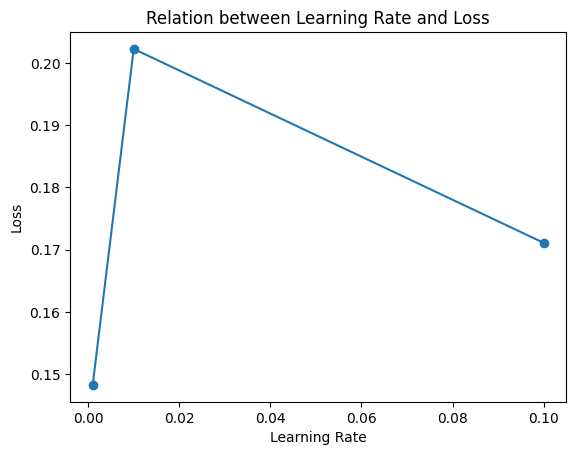

In [5]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

learning_rates = [0.001, 0.01, 0.1]
losses = []

for lr in learning_rates:
    mlp = MLPClassifier(hidden_layer_sizes=(10,), max_iter=300, learning_rate_init=lr, random_state=1)
    mlp.fit(X_train, y_train)
    losses.append(mlp.loss_)

plt.plot(learning_rates, losses, marker='o')
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.title('Relation between Learning Rate and Loss')
plt.show()


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


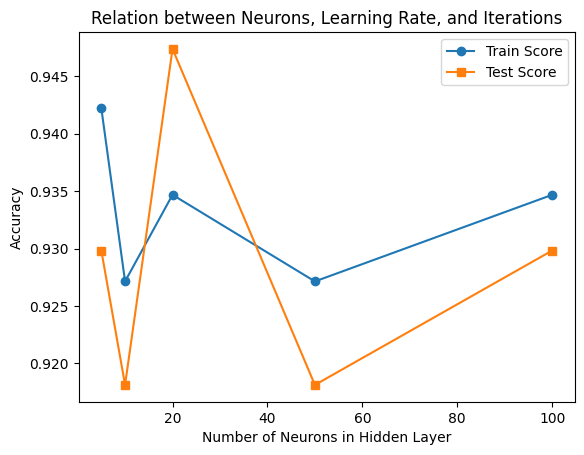

In [6]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

neurons = [5, 10, 20, 50, 100]
train_scores = []
test_scores = []

for n in neurons:
    mlp = MLPClassifier(hidden_layer_sizes=(n,), max_iter=300, learning_rate_init=0.01, random_state=1)
    mlp.fit(X_train, y_train)
    train_scores.append(mlp.score(X_train, y_train))
    test_scores.append(mlp.score(X_test, y_test))

plt.plot(neurons, train_scores, label='Train Score', marker='o')
plt.plot(neurons, test_scores, label='Test Score', marker='s')
plt.xlabel('Number of Neurons in Hidden Layer')
plt.ylabel('Accuracy')
plt.title('Relation between Neurons, Learning Rate, and Iterations')
plt.legend()
plt.show()
